<a href="https://colab.research.google.com/github/Laelapz/Some_Tests/blob/main/ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Imports***

In [ ]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
import graphviz
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from datetime import datetime
from sklearn.svm import LinearSVC
from sklearn.tree import export_graphviz
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ***Classificador Linear - Linear SVC***

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head() 

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns=a_renomear)

In [ ]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)

In [ ]:
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados['kilometros_por_ano'] = dados.milhas_por_ano * 1.60934
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)

In [ ]:
x = dados[['preco', 'idade_do_modelo', 'kilometros_por_ano']]
y = dados['vendido']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print('treino de {} e teste de {}'.format(len(treino_x), len(teste_x)))

modelo = LinearSVC(max_iter=1000)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print('A acurácia foi de: %.2f%%' % acuracia)

treino de 7500 e teste de 2500
A acurácia foi de: 62.80%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# ***Testando Dummies que chutam tudo zero ou um***

In [ ]:
dummy_stratified = DummyClassifier(strategy = "stratified")
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia do dummy_stratified foi de: %.2f%%" % acuracia)

A acurácia do dummy_stratified foi de: 52.44%


In [ ]:
dummy_most_frequent = DummyClassifier(strategy = "most_frequent")
dummy_most_frequent.fit(treino_x, treino_y)
previsoes = dummy_most_frequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia do dummy_most_frequent foi de: %.2f%%" % acuracia)

A acurácia do dummy_most_frequent foi de: 58.00%


# ***Classificar Não Linear - SVC***

In [ ]:
SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("tamanho do treino: {} tamanho do teste: {} ".format(len(raw_treino_x), len(raw_teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia do SVC foi de %.2f%%" %acuracia)

tamanho do treino: 7500 tamanho do teste: 2500 
A acuracia do SVC foi de 77.48%


Árvore de decisão

tamanho do treino: 7500 tamanho do teste: 2500 
A acuracia do DecisionTree foi de 76.84%


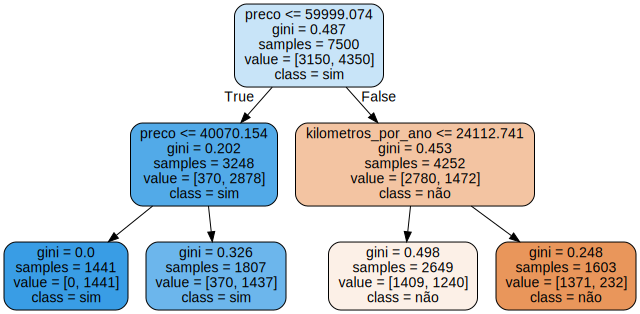

In [ ]:
SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print("tamanho do treino: {} tamanho do teste: {} ".format(len(raw_treino_x), len(raw_teste_x)))


modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acuracia do DecisionTree foi de %.2f%%" %acuracia)

features = x.columns

dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, feature_names=features, class_names=["não", 'sim'])
grafico = graphviz.Source(dot_data)
grafico